# Тестовое задание. Киселев Павел (kiselev.pd@yandex.ru)

## Задание 1

## 1)

* **Найди долю незавершенных заказов среди всех заказов бизнеса.**

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [369]:
df1 = pd.read_csv('orders.csv')
df1.head()

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,1/1/2019,id13276,product2,да,1/1/2019,4050,4050,0
1,order3,1/1/2019,id10315,product1,да,1/1/2019,4300,4300,0
2,order4,1/1/2019,id10036,product4,да,1/1/2019,4300,4300,0
3,order6,1/1/2019,id12315,product3,да,1/1/2019,4200,4200,0
4,order7,1/1/2019,id7700,product2,да,1/1/2019,4050,4050,0


Выполним подготовку данных. Присвоим в столбце 'Оплачен' флагу  'нет' значение 0, флагу 'да' значение 1.

In [370]:
df1 = df1.assign(Оплачен=lambda x: x.Оплачен.map({'нет': 0, 'да':1}))
df1

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,1/1/2019,id13276,product2,1,1/1/2019,4050,4050,0
1,order3,1/1/2019,id10315,product1,1,1/1/2019,4300,4300,0
2,order4,1/1/2019,id10036,product4,1,1/1/2019,4300,4300,0
3,order6,1/1/2019,id12315,product3,1,1/1/2019,4200,4200,0
4,order7,1/1/2019,id7700,product2,1,1/1/2019,4050,4050,0
...,...,...,...,...,...,...,...,...,...
21280,order21938,12/29/2019,id14621,product9,0,неоплачен,3220,4600,1380
21281,order21939,12/29/2019,id3056,product9,0,неоплачен,3220,4600,1380
21282,order21941,12/29/2019,id3056,product7,0,неоплачен,2765,3950,1185
21283,order21946,12/29/2019,id14618,product7,0,неоплачен,3950,3950,0


Проверим, что среди оплаченных заказов нет дупликатов.

In [57]:
len(df1[df1['Оплачен'] == 1]) == len(df1[df1['Оплачен'] == 1].drop_duplicates(subset=['User ID', 'ID продукта', 'Оплачен']))

True

Далее посчитаем долю незавершенных заказов. Для этого используем функцию np.ceil(x.mean()), где x — данные, сгрупированные по продукту.

In [65]:
df1_agg = df1.groupby(['User ID', 'ID продукта']).agg(func=lambda x: np.ceil(x.mean()))
df1_agg

/var/folders/_b/plz18n8x6kl7y27mc26q51jw0000gn/T/ipykernel_2682/2472646308.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  df1 = df.groupby(['User ID', 'ID продукта']).agg(func=lambda x: np.ceil(x.mean()))


Оплачен  Сумма заказа
User ID ID продукта                       
id1     product1         1.0        4300.0
        product4         1.0        4300.0
id10    product10        1.0        4200.0
        product7         1.0        3950.0
id100   product11        1.0        4000.0
...                      ...           ...
id9996  product4         1.0        4300.0
id9997  product1         1.0        4300.0
id9998  product7         0.0        3950.0
        product8         1.0        4500.0
id9999  product11        1.0        4000.0

[19531 rows x 2 columns]

В итоге, n неудачных попыток засчитаны как одна неудачная (среднее по n нулям с округлением вверх до целого — это один ноль), n-1 неудачных попыток и 1 удачная засчитаны как одна удачная (среднее по n-1 нулям и 1 единице с округлением верх до целого — это одна единица).

In [74]:
print(f"Доля незавершенных заказов = {1 - df1_agg['Оплачен'].mean():.2f}")

Доля незавершенных заказов = 0.29


## 2)

In [378]:
df2 = pd.read_csv('orders.csv')
df2 = df2[df2['Оплачен'] == 'да']
df2

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки
0,order1,1/1/2019,id13276,product2,да,1/1/2019,4050,4050,0
1,order3,1/1/2019,id10315,product1,да,1/1/2019,4300,4300,0
2,order4,1/1/2019,id10036,product4,да,1/1/2019,4300,4300,0
3,order6,1/1/2019,id12315,product3,да,1/1/2019,4200,4200,0
4,order7,1/1/2019,id7700,product2,да,1/1/2019,4050,4050,0
...,...,...,...,...,...,...,...,...,...
13858,order21943,12/29/2019,id5486,product3,да,12/29/2019,2940,4200,1260
13859,order21944,12/29/2019,id5527,product9,да,12/29/2019,1840,4600,2760
13860,order21945,12/29/2019,id5315,product7,да,12/29/2019,3950,3950,0
13861,order21949,12/30/2019,id9255,product4,да,12/30/2019,4300,4300,0


In [379]:
prod = pd.read_csv('products.csv')
prod

,ID продукта,Название продукта,Юнит
0,product1,Здоровый образ жизни,A
1,product2,Экскурс в историю моды,A
2,product3,Как научиться ценить музыку,B
3,product4,Путеводитель по истории искусства,B
4,product5,История западных культур,A
5,product6,Современный этикет,B
6,product7,Как аргументировать свою позицию,A
7,product8,Что скрыл художник?,A
8,product9,Искусство киноязыка,B
9,product10,Введение в нейробиологию,B


Подготовим данные. Присвоим записям в df2 соответствующие 'Юнит' и 'Месяц'.

In [380]:
df2 = pd.merge(df2, prod[['ID продукта', 'Юнит']], on='ID продукта')
df2['Сумма платежа'] = df2['Сумма платежа'].str.replace(',', '.').astype(float)
df2['Дата создания'] = pd.to_datetime(df2['Дата создания'])
df2['Месяц'] = df2['Дата создания'].apply(lambda x: x.month)
df2

,Order ID,Дата создания,User ID,ID продукта,Оплачен,Дата платежа,Сумма платежа,Сумма заказа,Сумма скидки,Юнит,Месяц
0,order1,2019-01-01,id13276,product2,да,1/1/2019,4050.0,4050,0,A,1
1,order7,2019-01-01,id7700,product2,да,1/1/2019,4050.0,4050,0,A,1
2,order9,2019-01-02,id7962,product2,да,1/2/2019,4050.0,4050,0,A,1
3,order10,2019-01-02,id11652,product2,да,1/2/2019,3240.0,4050,810,A,1
4,order11,2019-01-02,id11058,product2,да,1/2/2019,4050.0,4050,0,A,1
...,...,...,...,...,...,...,...,...,...,...,...
13858,order21921,2019-12-29,id1541,product11,да,12/29/2019,2400.0,4000,1600,B,12
13859,order21923,2019-12-29,id10023,product11,да,12/29/2019,4000.0,4000,0,B,12
13860,order21930,2019-12-29,id1793,product11,да,12/29/2019,2800.0,4000,1200,B,12
13861,order21934,2019-12-29,id4259,product11,да,12/29/2019,4000.0,4000,0,B,12


* **Посчитай выручку и средние чеки (выручка / кол-во клиентов) юнитов A или B за год. Какой отдел приносит больше выручки компании?**

In [396]:
num_clients = len(df2['User ID'].unique())

In [397]:
res = df2.groupby('Юнит').agg(revenue=pd.NamedAgg(column='Сумма платежа', aggfunc='sum')) \
                         .assign(mean_check=lambda x: x['revenue'] / num_clients)
res

,revenue,mean_check
Юнит,,
A,"28,101,149.4","2,334.0"
B,"19,819,209.9","1,646.1"


In [399]:
print(f"""Юнит A: выручка = {res['revenue']['A']:,.0f}, ср.чек = {res['mean_check']['A']:.0f}
          Юнит B: выручка = {res['revenue']['B']:,.0f}, ср.чек = {res['mean_check']['B']:.0f}""")

Юнит A: выручка = 28,101,149, ср.чек = 2334
Юнит B: выручка = 19,819,210, ср.чек = 1646


* **Изобрази на диаграмме долю каждого курса в выручке юнитов A и B по месяцам. Какие курсы приносили юнитам больше всего дохода в каждый из месяцев (требуется вывести названия курсов)?**

Посчитаем выручку каждого продукта по месяцам.

In [400]:
foo = pd.DataFrame.from_records(
          
          df2.groupby(['Юнит', 'Месяц', 'ID продукта']) \
             .agg(month_rev_by_prod=pd.NamedAgg(column='Сумма платежа', aggfunc='sum')) \
             .to_records()
    
          )
foo

,Юнит,Месяц,ID продукта,month_rev_by_prod
0,A,1,product1,"204,001.7"
1,A,1,product2,"247,061.5"
2,A,1,product5,"472,079.2"
3,A,2,product1,"559,936.5"
4,A,2,product2,"155,781.0"
...,...,...,...,...
105,B,12,product11,"470,846.7"
106,B,12,product3,"176,820.0"
107,B,12,product4,"315,679.0"
108,B,12,product6,"100,380.0"


Посчитаем месячную выручку по юнитам.

In [401]:
bar = pd.DataFrame.from_records(
          
          df2.groupby(['Юнит', 'Месяц']) \
             .agg(month_rev=pd.NamedAgg(column='Сумма платежа', aggfunc='sum')) \
             .to_records()
    
          )
bar

,Юнит,Месяц,month_rev
0,A,1,"923,142.4"
1,A,2,"1,133,340.1"
2,A,3,"1,771,981.9"
3,A,4,"3,892,025.8"
4,A,5,"2,131,264.8"
5,A,6,"3,677,846.9"
6,A,7,"3,486,613.1"
7,A,8,"2,505,867.9"
8,A,9,"594,028.7"
9,A,10,"3,265,298.4"


Объеденим таблицы.

In [402]:
df2 = pd.merge(foo, bar, on=['Юнит', 'Месяц'])
df2

,Юнит,Месяц,ID продукта,month_rev_by_prod,month_rev
0,A,1,product1,"204,001.7","923,142.4"
1,A,1,product2,"247,061.5","923,142.4"
2,A,1,product5,"472,079.2","923,142.4"
3,A,2,product1,"559,936.5","1,133,340.1"
4,A,2,product2,"155,781.0","1,133,340.1"
...,...,...,...,...,...
105,B,12,product11,"470,846.7","2,870,060.0"
106,B,12,product3,"176,820.0","2,870,060.0"
107,B,12,product4,"315,679.0","2,870,060.0"
108,B,12,product6,"100,380.0","2,870,060.0"


Посчитаем месячные доли по продуктам.

In [406]:
df2['prod_prop'] = df2['month_rev_by_prod'] / df2['month_rev']
df2

,Юнит,Месяц,ID продукта,month_rev_by_prod,month_rev,prod_prop
0,A,1,product1,"204,001.65","923,142.35",0.22
1,A,1,product2,"247,061.54","923,142.35",0.27
2,A,1,product5,"472,079.16","923,142.35",0.51
3,A,2,product1,"559,936.53","1,133,340.14",0.49
4,A,2,product2,"155,781.03","1,133,340.14",0.14
...,...,...,...,...,...,...
105,B,12,product11,"470,846.68","2,870,060.03",0.16
106,B,12,product3,"176,820.00","2,870,060.03",0.06
107,B,12,product4,"315,679.02","2,870,060.03",0.11
108,B,12,product6,"100,380.00","2,870,060.03",0.03


Построим диаграммы.

Text(0.5, 0.98, 'Доля каждого продукта в выручке юнита A')

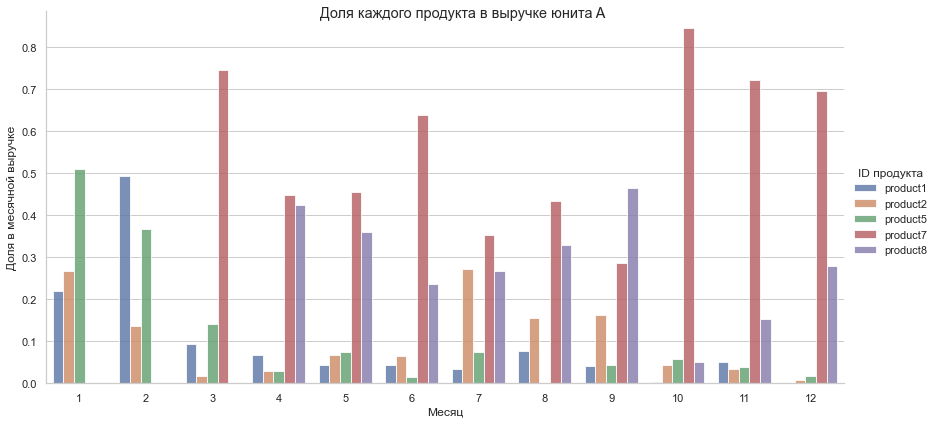

In [407]:
sns.set_theme(style="whitegrid")

# Plot the responses for different events and regions
g = sns.catplot(x='Месяц', y='prod_prop',
                hue='ID продукта', kind='bar',
                data=df2[df2['Юнит'] == 'A'], alpha=.8,
                height=6, aspect=12/6)

g.set_axis_labels('Месяц', 'Доля в месячной выручке')
g.fig.suptitle('Доля каждого продукта в выручке юнита A')

Text(0.5, 0.98, 'Доля каждого продукта в выручке юнита B')

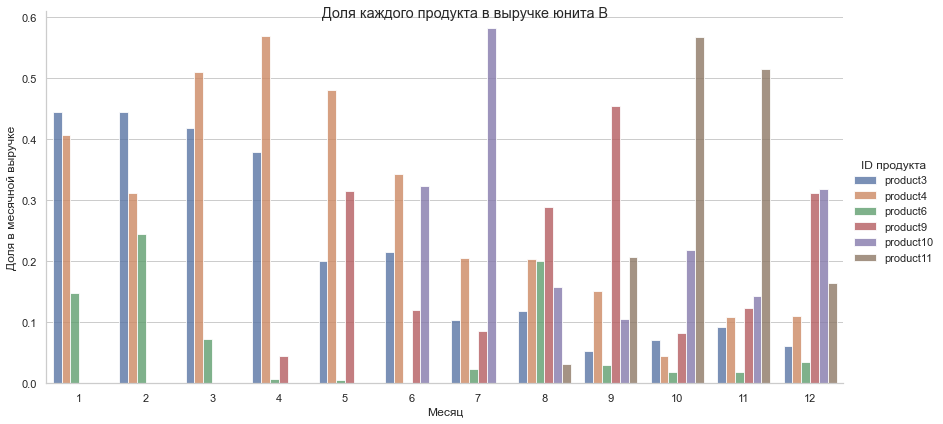

In [408]:
sns.set_theme(style="whitegrid")

# Plot the responses for different events and regions
g = sns.catplot(x='Месяц', y='prod_prop',
                hue='ID продукта', kind='bar',
                data=df2[df2['Юнит'] == 'B'], alpha=.8,
                height=6, aspect=12/6)

g.set_axis_labels('Месяц', 'Доля в месячной выручке')
g.fig.suptitle('Доля каждого продукта в выручке юнита B')

Выведем в таблицу лучшие продукты по месячной выручке.

In [415]:
foo = pd.DataFrame.from_records(
          
          df2.groupby(['Юнит', 'Месяц']) \
             .agg(prod_prop=pd.NamedAgg(column='prod_prop', aggfunc='max')) \
             .to_records()
    
          )

bar = pd.merge(foo, df2[['ID продукта', 'prod_prop']], on='prod_prop')
bar = pd.merge(bar, prod[['ID продукта', 'Название продукта']], on='ID продукта')
bar = bar.sort_values(by=['Юнит', 'Месяц'], ignore_index=True)
bar

,Юнит,Месяц,prod_prop,ID продукта,Название продукта
0,A,1,0.51,product5,История западных культур
1,A,2,0.49,product1,Здоровый образ жизни
2,A,3,0.75,product7,Как аргументировать свою позицию
3,A,4,0.45,product7,Как аргументировать свою позицию
4,A,5,0.45,product7,Как аргументировать свою позицию
5,A,6,0.64,product7,Как аргументировать свою позицию
6,A,7,0.35,product7,Как аргументировать свою позицию
7,A,8,0.44,product7,Как аргументировать свою позицию
8,A,9,0.47,product8,Что скрыл художник?
9,A,10,0.85,product7,Как аргументировать свою позицию


* **Посчитай NPS каждого продукта юнитов A и B и средние NPS по продуктам отделов. NPS = (Кол-во промоутеров - Кол-во детракторов)/(Кол-во респондентов).**

Подготовим данные.

In [417]:
df3 = pd.read_csv('nps.csv')
df3 = df3.rename(columns={'Название курса': 'Название продукта'})
df3 = pd.merge(df3, prod[['Название продукта', 'Юнит', 'ID продукта']], on='Название продукта')
df3

,Название продукта,ID пользователя,Оценка,Юнит,ID продукта
0,Введение в нейробиологию,id7137,7,B,product10
1,Введение в нейробиологию,id6805,7,B,product10
2,Введение в нейробиологию,id3323,8,B,product10
3,Введение в нейробиологию,id2286,4,B,product10
4,Введение в нейробиологию,id14009,7,B,product10
...,...,...,...,...,...
13858,Экскурс в историю моды,id689,10,A,product2
13859,Экскурс в историю моды,id468,8,A,product2
13860,Экскурс в историю моды,id7055,9,A,product2
13861,Экскурс в историю моды,id460,3,A,product2


Проставим флаги: промоутер = 1, нейтральный = 0, детрактор = -1 (для удобства счета).

In [418]:
def filter(x):
    if x >= 9: return 1
    elif x == 8 or x == 7: return 0
    else: return -1
    
df3['nps_flg'] = df3['Оценка'].apply(filter)
df3

,Название продукта,ID пользователя,Оценка,Юнит,ID продукта,nps_flg
0,Введение в нейробиологию,id7137,7,B,product10,0
1,Введение в нейробиологию,id6805,7,B,product10,0
2,Введение в нейробиологию,id3323,8,B,product10,0
3,Введение в нейробиологию,id2286,4,B,product10,-1
4,Введение в нейробиологию,id14009,7,B,product10,0
...,...,...,...,...,...,...
13858,Экскурс в историю моды,id689,10,A,product2,1
13859,Экскурс в историю моды,id468,8,A,product2,0
13860,Экскурс в историю моды,id7055,9,A,product2,1
13861,Экскурс в историю моды,id460,3,A,product2,-1


Посчитаем NPS как среднее по столбцу 'nps_flg'.

In [419]:
df3.groupby(['Юнит', 'Название продукта']).mean() \
   .rename(columns={'Оценка': 'Средняя оценка', 'nps_flg': 'NPS'})

Средняя оценка   NPS
Юнит Название продукта                                      
A    Здоровый образ жизни                         5.56 -0.41
     История западных культур                     5.54 -0.40
     Как аргументировать свою позицию             5.76 -0.35
     Что скрыл художник?                          5.85 -0.26
     Экскурс в историю моды                       5.70 -0.35
B    Введение в нейробиологию                     5.39 -0.42
     Главные идеи в мировой философии             5.36 -0.42
     Искусство киноязыка                          5.51 -0.40
     Как научиться ценить музыку                  5.52 -0.39
     Путеводитель по истории искусства            5.63 -0.35
     Современный этикет                           5.60 -0.36

Посчитаем NPS по юнитам.

In [420]:
df3.groupby('Юнит').mean() \
   .rename(columns={'Оценка': 'Средняя оценка', 'nps_flg': 'NPS'})

,Средняя оценка,NPS
Юнит,,
A,5.75,-0.34
B,5.48,-0.40


Допустим, клиент, довольный курсом (“промоутер”), с вероятностью $p$ приведет друга, который принесет компании сумму, равную среднему чеку бизнес-юнита, продукт которого порекомендовал клиент. Клиент принимает решение порекомендовать или нет каждый курс отдельно и независимо (т. е. он может привести нескольких друзей, если ему понравилось несколько курсов).

* **Может ли доход от рекомендаций клиентов позволить юниту с меньшей выручкой от продаж стать не менее доходным, чем юнит с большей выручкой от продаж? Если да, то при каких $p$?**

Напомню выручку по юнитам.

In [421]:
print(f"""Юнит A: выручка = {res['revenue']['A']:,.0f}, ср.чек = {res['mean_check']['A']:.0f}
          Юнит B: выручка = {res['revenue']['B']:,.0f}, ср.чек = {res['mean_check']['B']:.0f}""")

Юнит A: выручка = 28,101,149, ср.чек = 2334
Юнит B: выручка = 19,819,210, ср.чек = 1646


Менее доходный — Юнит B. Посчитаем для него ожидаемую выручку для различных $p$ с шагом 0.05.

In [422]:
p = np.arange(0, 1.05, 0.05)
expected_uplift_B = len(df3.loc[(df3['Юнит'] == 'B') & (df3['nps_flg'] == 1)]) * p * res['mean_check']['B']
expected_rev_B = expected_uplift_B + res['revenue']['B']
expected_rev_B

array([19819209.92731461, 19913120.71853997, 20007031.50976532,
       20100942.30099068, 20194853.09221604, 20288763.8834414 ,
       20382674.67466675, 20476585.46589211, 20570496.25711747,
       20664407.04834282, 20758317.83956818, 20852228.63079354,
       20946139.42201889, 21040050.21324425, 21133961.00446961,
       21227871.79569497, 21321782.58692032, 21415693.37814568,
       21509604.16937103, 21603514.96059639, 21697425.75182175])

In [435]:
print(f"""Максимально возможная выручка юнита B (при p=1) = {max(expected_rev_B):,.0f} 
                                                          < {res['revenue']['A']:,.0f} = выручка юнита A.""")

Максимально возможная выручка юнита B (при p=1) = 21,697,426 < 28,101,149 = выручка юнита A.


Юнит B не сможет сдать более доходным, чем юнит A.